In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.integrate import dblquad
from matplotlib.colors import LogNorm

%matplotlib widget 

In [38]:
def particle_in_box(x, box_width, n):
    return np.sqrt(2/box_width)*np.sin(n*np.pi*x/box_width)

def lopsided(x, side):
    a = 10
    if side == 'left':
        return np.piecewise(x, [x < 10/3, x >= 10/3], [lambda x: 3*particle_in_box(x,a,3), 0])
    else:
        return np.piecewise(x, [x < 20/3, x >= 20/3], [0, lambda x: 3*particle_in_box(x,a,3)])

def P_simple_distinguishable(x1,x2):
    a = 10
    return np.abs(particle_in_box(x1, a, 1)*particle_in_box(x2, a, 3))**2

def P_complex_unentangled(x1,x2):
    a=10
    psi_a = 1/np.sqrt(2)*particle_in_box(x1, a, 4)+1/np.sqrt(2)*particle_in_box(x1, a, 2)
    psi_b = 1/np.sqrt(2)*particle_in_box(x2, a, 3)+1/np.sqrt(2)*particle_in_box(x2, a, 5)
    return np.abs(psi_a*psi_b)**2

def P_dist_entangled(x1,x2):
    a = 10
    #return np.abs(3/5*particle_in_box(x1, a, 1)*particle_in_box(x2, a, 2) + 4/5*particle_in_box(x1, a,2)*particle_in_box(x2, a, 1))**2
    return np.abs(1/np.sqrt(2)*particle_in_box(x1, a, 4)*particle_in_box(x2, a, 5) 
                  + 1/np.sqrt(2)* particle_in_box(x1, a, 2)*particle_in_box(x2, a, 3))**2

def P_freaky_unentangled(x1,x2):
    return np.abs(1/2*(lopsided(x1, 'left') + lopsided(x1,'right'))
                  * (lopsided(x2, 'left') + lopsided(x2, 'right')))**2


def P_freaky_entangled(x1,x2):
    return np.abs(1/np.sqrt(2)* (lopsided(x1,'left')*lopsided(x2,'left')
                  + lopsided(x1,'right')*lopsided(x2,'right')))**2

def double_integral(func, start1, stop1, start2, stop2):
    return dblquad(func, start1, stop1, lambda x: start2, lambda x: stop2)[0]



In [34]:
x1 = np.linspace(0,10,100)
x2 = np.linspace(0,10,100)
X1, X2 = np.meshgrid(x1,x2)

Text(0.15, 0.95, 'Normalization: 0.9999999999999999')

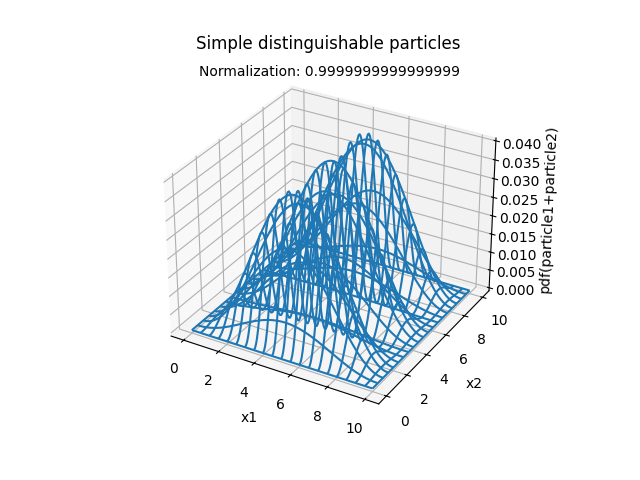

In [35]:
simple = P_simple_distinguishable(X1,X2)

norm = double_integral(P_simple_distinguishable, 0, 10, 0, 10)

fig_dist1 = plt.figure()
ax = fig_dist1.add_subplot(projection='3d')
ax.plot_wireframe(X1, X2, simple, rstride=5, cstride=5)
ax.set_xlabel('x1') 
ax.set_ylabel('x2') 
ax.set_zlabel('pdf(particle1+particle2)') 
#ax.set_zlim(0, 0.1)
ax.set_title('Simple distinguishable particles')
ax.text2D(0.15, 0.95, "Normalization: " + str(norm), transform=ax.transAxes)

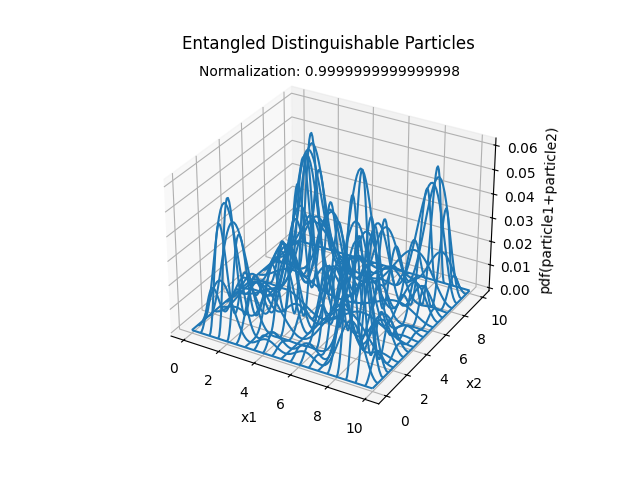

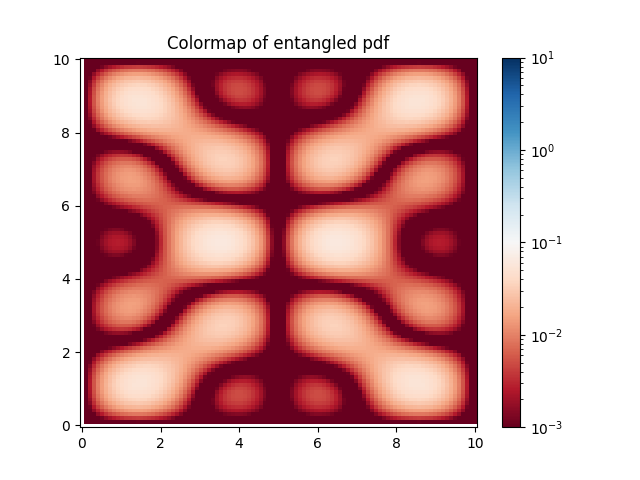

In [39]:
entangled = P_dist_entangled(X1,X2)
norm2 = double_integral(P_dist_entangled, 0, 10, 0, 10)

fig_dist2 = plt.figure()
ax = fig_dist2.add_subplot(projection='3d')
ax.plot_wireframe(X1, X2, entangled, rstride=5, cstride=5)
ax.set_xlabel('x1') 
ax.set_ylabel('x2') 
ax.set_zlabel('pdf(particle1+particle2)') 
#ax.set_zlim(0,0.1)
ax.set_title('Entangled Distinguishable Particles')
ax.text2D(0.15, 0.95, "Normalization: " + str(norm2), transform=ax.transAxes)

fig2, ax2 = plt.subplots()
#c = ax2.pcolormesh(X1, X2, entangled, cmap='RdBu', vmin=np.min(entangled), vmax=np.max(entangled))
#c = ax2.pcolormesh(X1, X2, entangled, cmap='RdBu', norm='log')
c = ax2.pcolormesh(X1, X2, entangled, cmap='RdBu', norm=LogNorm(vmin=1e-3, vmax=1e1))

ax2.set_title('Colormap of entangled pdf')
fig2.colorbar(c, ax=ax2)

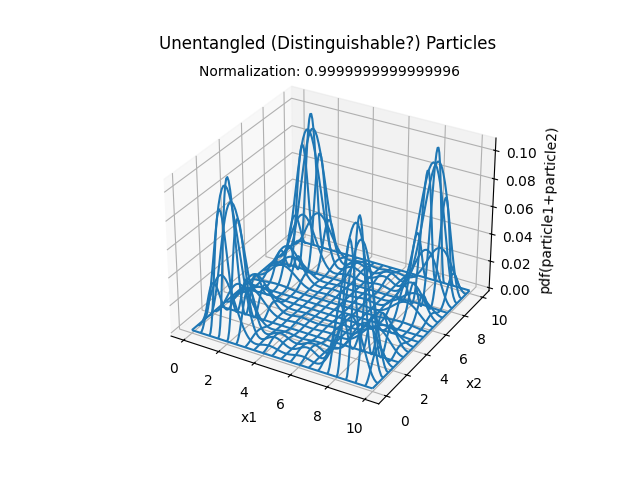

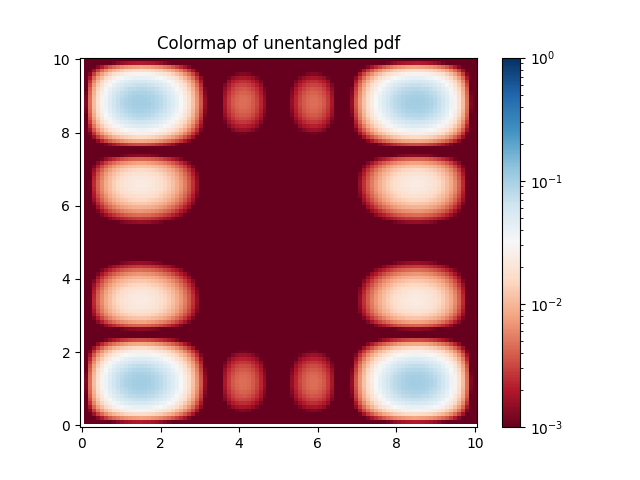

In [40]:
unentangled = P_complex_unentangled(X1,X2)
norm3 = double_integral(P_complex_unentangled, 0, 10, 0, 10)

fig_dist3 = plt.figure()
ax = fig_dist3.add_subplot(projection='3d')
ax.plot_wireframe(X1, X2, unentangled, rstride=5, cstride=5)
ax.set_xlabel('x1') 
ax.set_ylabel('x2') 
ax.set_zlabel('pdf(particle1+particle2)') 
#ax.set_zlim(0,0.1)
ax.set_title('Unentangled (Distinguishable?) Particles')
ax.text2D(0.15, 0.95, "Normalization: " + str(norm3), transform=ax.transAxes)

fig2, ax2 = plt.subplots()
#c = ax2.pcolormesh(X1, X2, unentangled, cmap='RdBu', vmin=np.min(unentangled), vmax=np.max(unentangled))
#c = ax2.pcolormesh(X1, X2, unentangled, cmap='RdBu', norm='log')
c = ax2.pcolormesh(X1, X2, unentangled, cmap='RdBu', norm=LogNorm(vmin=1e-3, vmax=1e0))

ax2.set_title('Colormap of unentangled pdf')
fig2.colorbar(c, ax=ax2)

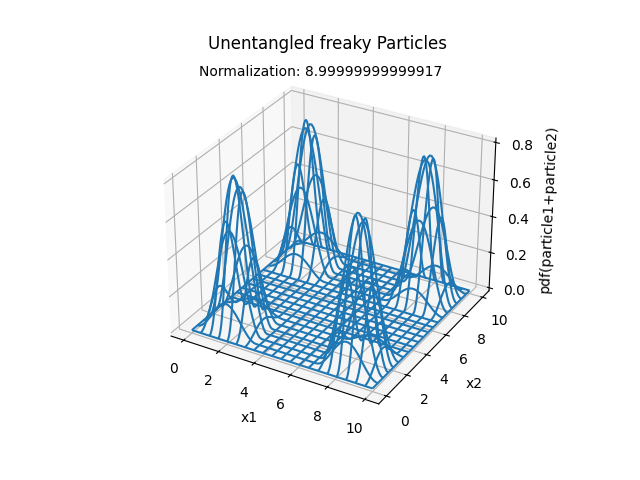

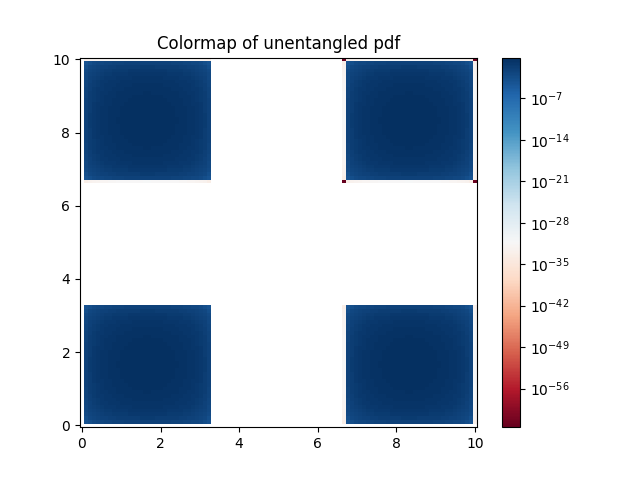

In [7]:
freaky_unentangled = P_freaky_unentangled(X1,X2)
norm4 = double_integral(P_freaky_unentangled, 0, 10, 0, 10)

fig_dist3 = plt.figure()
ax = fig_dist3.add_subplot(projection='3d')
ax.plot_wireframe(X1, X2, freaky_unentangled, rstride=5, cstride=5)
ax.set_xlabel('x1') 
ax.set_ylabel('x2') 
ax.set_zlabel('pdf(particle1+particle2)') 
#ax.set_zlim(0,0.1)
ax.set_title('Unentangled freaky Particles')
ax.text2D(0.15, 0.95, "Normalization: " + str(norm4), transform=ax.transAxes)

fig2, ax2 = plt.subplots()
#c = ax2.pcolormesh(X1, X2, unentangled, cmap='RdBu', vmin=np.min(unentangled), vmax=np.max(unentangled))
c = ax2.pcolormesh(X1, X2, freaky_unentangled, cmap='RdBu', norm='log')
#c = ax2.pcolormesh(X1, X2, unentangled, cmap='RdBu', norm=LogNorm(vmin=1e-3, vmax=1e0))

ax2.set_title('Colormap of unentangled pdf')
fig2.colorbar(c, ax=ax2)

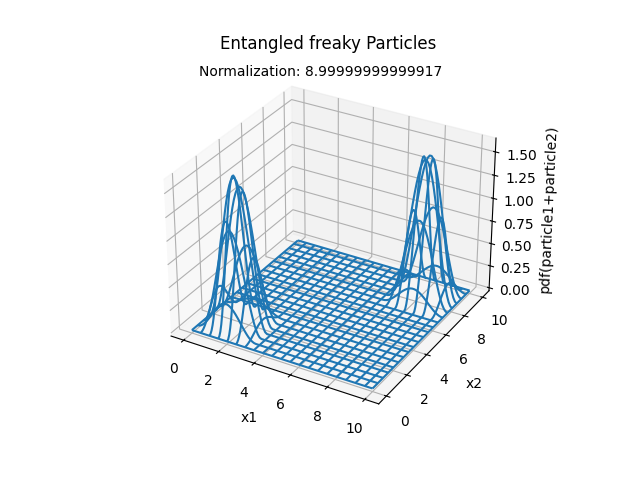

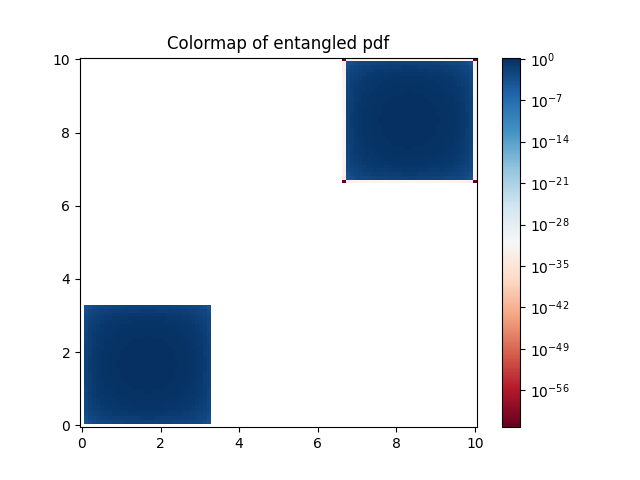

In [24]:
freaky_entangled = P_freaky_entangled(X1,X2)
norm5 = double_integral(P_freaky_entangled, 0, 10, 0, 10)

fig_dist3 = plt.figure()
ax = fig_dist3.add_subplot(projection='3d')
ax.plot_wireframe(X1, X2, freaky_entangled, rstride=5, cstride=5)
ax.set_xlabel('x1') 
ax.set_ylabel('x2') 
ax.set_zlabel('pdf(particle1+particle2)') 
#ax.set_zlim(0,0.1)
ax.set_title('Entangled freaky Particles')
ax.text2D(0.15, 0.95, "Normalization: " + str(norm5), transform=ax.transAxes)

fig2, ax2 = plt.subplots()
#c = ax2.pcolormesh(X1, X2, unentangled, cmap='RdBu', vmin=np.min(unentangled), vmax=np.max(unentangled))
c = ax2.pcolormesh(X1, X2, freaky_entangled, cmap='RdBu', norm='log')
#c = ax2.pcolormesh(X1, X2, unentangled, cmap='RdBu', norm=LogNorm(vmin=1e-3, vmax=1e0))

ax2.set_title('Colormap of entangled pdf')
fig2.colorbar(c, ax=ax2)